# 데이터 불러오기

In [4]:
import os
from dotenv import load_dotenv
import requests
from bs4 import BeautifulSoup
import json
import pandas as pd

load_dotenv()
SERVICE_KEY = os.getenv('SERVICE_KEY')

In [13]:
'''
df=None
for i in range(1,75):
    URL=f'http://openapi.seoul.go.kr:8088/{SERVICE_KEY}/json/tbLnOpendataRtmsV/{1+(i-1)*1000}/{i*1000}/'
    print(URL)
    req= requests.get(URL)
    content=req.json()
    
    result=pd.DataFrame(content['tbLnOpendataRtmsV']['row'])
    df=pd.concat([df,result])
df=df.reset_index(drop=True)
df
'''

"\ndf=None\nfor i in range(1,75):\n    URL=f'http://openapi.seoul.go.kr:8088/{SERVICE_KEY}/json/tbLnOpendataRtmsV/{1+(i-1)*1000}/{i*1000}/'\n    print(URL)\n    req= requests.get(URL)\n    content=req.json()\n    result=pd.DataFrame(content['tbLnOpendataRtmsV']['row'])\n    df=pd.concat([df,result])\ndf=df.reset_index(drop=True)\ndf\n"

In [14]:
df.to_csv('1-75.csv', index=False)

In [17]:
df = pd.read_csv('1-75.csv')
df.head()

,ACC_YEAR,SGG_CD,SGG_NM,BJDONG_CD,BJDONG_NM,LAND_GBN,LAND_GBN_NM,BONBEON,BUBEON,BLDG_NM,...,OBJ_AMT,BLDG_AREA,TOT_AREA,FLOOR,RIGHT_GBN,CNTL_YMD,BUILD_YEAR,HOUSE_TYPE,REQ_GBN,RDEALER_LAWDNM
0,2024,11380,은평구,10700,응암동,1.0,대지,91.0,7.0,CJ드림시티,...,12900,24.84,34.07,15.0,NaN,NaN,2004.0,오피스텔,중개거래,서울 은평구
1,2024,11140,중구,14500,광희동1가,1.0,대지,89.0,1.0,광희동금호트윈 오피스텔,...,9850,21.96,31.13,14.0,NaN,NaN,1999.0,오피스텔,중개거래,서울 중구
2,2024,11740,강동구,10900,천호동,1.0,대지,39.0,9.0,미래위너스,...,26400,29.96,19.16,4.0,NaN,NaN,2016.0,연립다세대,중개거래,서울 강동구
3,2024,11710,송파구,11300,거여동,1.0,대지,605.0,0.0,휴먼빌 시티,...,18000,24.15,35.41,4.0,NaN,NaN,2020.0,오피스텔,중개거래,서울 송파구
4,2024,11530,구로구,10200,구로동,1.0,대지,44.0,8.0,비즈트위트 오렌지,...,15000,20.80,31.43,8.0,NaN,NaN,2013.0,오피스텔,중개거래,서울 영등포구


In [19]:
df.tail()

,ACC_YEAR,SGG_CD,SGG_NM,BJDONG_CD,BJDONG_NM,LAND_GBN,LAND_GBN_NM,BONBEON,BUBEON,BLDG_NM,...,OBJ_AMT,BLDG_AREA,TOT_AREA,FLOOR,RIGHT_GBN,CNTL_YMD,BUILD_YEAR,HOUSE_TYPE,REQ_GBN,RDEALER_LAWDNM
73995,2023,11710,송파구,11100,방이동,1.0,대지,50.0,0.0,잠실엘퍼스트오피스텔,...,21000,18.07,30.67,11.0,NaN,NaN,2019.0,오피스텔,중개거래,서울 송파구
73996,2023,11710,송파구,10200,신천동,1.0,대지,17.0,0.0,파크리오,...,165500,84.90,0.00,12.0,NaN,NaN,2008.0,아파트,중개거래,서울 송파구
73997,2023,11710,송파구,10700,가락동,1.0,대지,95.0,1.0,가락금호아파트,...,90000,59.91,0.00,12.0,NaN,NaN,1997.0,아파트,중개거래,서울 송파구
73998,2022,11230,동대문구,10900,휘경동,1.0,대지,183.0,245.0,빌리원,...,10800,15.75,22.53,4.0,NaN,NaN,2014.0,오피스텔,중개거래,서울 동대문구
73999,2023,11305,강북구,10100,미아동,NaN,NaN,NaN,NaN,NaN,...,26000,105.83,66.00,0.0,NaN,NaN,2001.0,단독다가구,중개거래,서울 강북구


In [21]:
df['ACC_YEAR'].value_counts()

2023    68916
2024     4795
2022      289
Name: ACC_YEAR, dtype: int64

# 데이터 탐색

In [62]:
df = pd.read_csv('./data/df.csv')
df.info()

C:\Users\skrtk\AppData\Local\Temp\ipykernel_3268\980361839.py:1: DtypeWarning: Columns (5,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./data/df.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 454397 entries, 0 to 454396
Data columns (total 17 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   454397 non-null  int64  
 1   ACC_YEAR     454397 non-null  int64  
 2   SGG_NM       454397 non-null  object 
 3   BJDONG_NM    454397 non-null  object 
 4   LAND_GBN_NM  424029 non-null  object 
 5   BONBEON      424042 non-null  object 
 6   BUBEON       424042 non-null  float64
 7   BLDG_NM      424027 non-null  object 
 8   DEAL_YMD     454397 non-null  int64  
 9   OBJ_AMT      454397 non-null  int64  
 10  BLDG_AREA    454397 non-null  float64
 11  TOT_AREA     454397 non-null  float64
 12  FLOOR        454397 non-null  float64
 13  CNTL_YMD     22281 non-null   float64
 14  BUILD_YEAR   451720 non-null  float64
 15  HOUSE_TYPE   454397 non-null  object 
 16  REQ_GBN      145541 non-null  object 
dtypes: float64(6), int64(4), object(7)
memory usage: 58.9+ MB


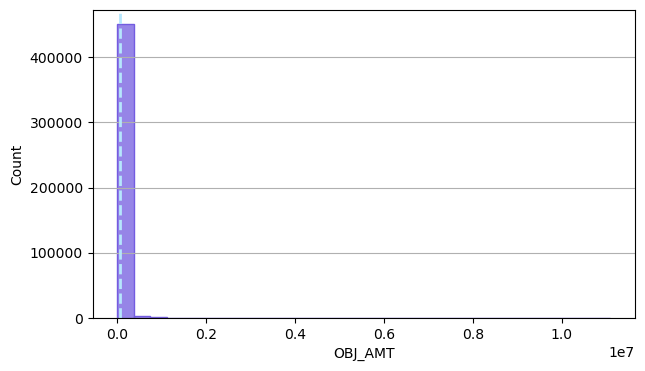

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(7, 4))
sns.histplot(df['OBJ_AMT'], bins=30, color='#735CE0', edgecolor='#735CE0')

plt.axvline(df['OBJ_AMT'].mean(), color='#B6E7FD', linestyle='dashed', linewidth=2)
plt.grid(axis='y')
plt.show()

In [95]:
import numpy as np
df['OBJ_AMT_LV'] = pd.qcut(df['OBJ_AMT'], q=3, labels=['LOW', 'MID', 'HIGH'])
df['OBJ_AMT_LV'].value_counts()

LOW     151937
MID     151828
HIGH    150632
Name: OBJ_AMT_LV, dtype: int64

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 454397 entries, 0 to 454396
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype   
---  ------       --------------   -----   
 0   Unnamed: 0   454397 non-null  int64   
 1   ACC_YEAR     454397 non-null  int64   
 2   SGG_NM       454397 non-null  object  
 3   BJDONG_NM    454397 non-null  object  
 4   LAND_GBN_NM  424029 non-null  object  
 5   BONBEON      424042 non-null  object  
 6   BUBEON       424042 non-null  float64 
 7   BLDG_NM      424027 non-null  object  
 8   DEAL_YMD     454397 non-null  int64   
 9   OBJ_AMT      454397 non-null  int64   
 10  BLDG_AREA    454397 non-null  float64 
 11  TOT_AREA     454397 non-null  float64 
 12  FLOOR        454397 non-null  float64 
 13  CNTL_YMD     22281 non-null   float64 
 14  BUILD_YEAR   451720 non-null  float64 
 15  HOUSE_TYPE   454397 non-null  object  
 16  REQ_GBN      145541 non-null  object  
 17  OBJ_AMT_LV   454397 non-null  category
dtypes: c